# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : IF8 - Scrapy
- Anggota : </br>
10122283 - Audrey Mediliani</br>
10122285 - Laras Almanna Salwa</br>
10122301 - Raka Bintang Pratama</br>
10122302 - Steave Imanuel</br>
10122303 - Juli Arsi Sabrina</br>
10122307 - Dhimas Kurnia Putra Supriyadi</br>

## Menentukan Pertanyaan Bisnis

- **10122283 - AUDREY MEDILIANI**
1. Seller mana yang menjual produk paling banyak (memvisualisasi hanya 5 teratas)?
2. Produk mana yang sering terjual (memvisualisasi hanya 5 teratas), lalu seller mana yang menjual produk tersebut dan berapa banyak penghasilan seller tersebut?
- **10122285 - LARAS ALMANNA SALWA**
3. Negara mana yang memiliki banyak seller dan sedikit sedikit seller?
- **10122302 - STEAVE IMANUEL**
4. 10 kota dengan customer terbanyak?
- **10122301 - RAKA BINTANG PRATAMA**
5. 10 Kategori Produk dengan Pemesanan Terbanyak
6. Tren Penjualan Bulanan untuk Kategori Produk Terlaris Tahun 2017-2018<br/>
10\. Persebaran Lokasi yang Terdaftar
- **10122303 - JULI ARSI SABRINA**
7. Apa saja metode pembayaran yang sering digunakan?
8. order_id yang sering berbelanja!
- **10122307 - DHIMAS KURNIA PUTRA SUPRIYADI**
9. Bagaimana perbandingan metode pembayaran yang digunakan oleh seluruh customer?

## Menyiapkan semua library yang dibutuhkan

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [55]:
df_customers = pd.read_csv('dataset/customers_dataset.csv')
df_customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [56]:
df_geolocation = pd.read_csv('dataset/geolocation_dataset.csv')
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [57]:
df_order_items = pd.read_csv('dataset/order_items_dataset.csv')
df_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [58]:
df_order_payments = pd.read_csv('dataset/order_payments_dataset.csv')
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [59]:
df_order_reviews = pd.read_csv('dataset/order_reviews_dataset.csv')
df_order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [60]:
dates = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
df_orders = pd.read_csv('dataset/orders_dataset.csv', parse_dates=dates)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [61]:
df_product_category_name_translation = pd.read_csv('dataset/product_category_name_translation.csv')
df_product_category_name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [62]:
df_products = pd.read_csv('dataset/products_dataset.csv')
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [63]:
df_sellers = pd.read_csv('dataset/sellers_dataset.csv')
df_sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [64]:
df_geolocation = pd.read_csv('dataset/geolocation_dataset.csv')
df_geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


### Assessing Data

In [65]:
df_order_payments[df_order_payments['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


In [66]:
df_orders[df_orders.isna().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [67]:
df_products[df_products.isna().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


### Cleaning Data

In [68]:
df_order_payments = df_order_payments[df_order_payments['payment_type'] != 'not_defined']
df_order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [69]:
df_orders = df_orders.dropna(how='any',axis=0)
df_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [70]:
df_products = df_products.dropna(how='any',axis=0)
df_products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


## Exploratory Data Analysis (EDA)

### Explore Pertanyaan 1: "Seller mana yang menjual produk paling banyak (memvisualisasi hanya 5 teratas)?"

In [71]:
# Menghitung jumlah produk yang dijual oleh setiap seller
jumlah_produk_per_seller = df_order_items['seller_id'].value_counts()
jumlah_produk_per_seller

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
400f221ab83037c0ea78f1267da9624d       1
1746c1ae87ac63d530c7c943d0ac42e2       1
16bdc8cefd0e32a6f0824d296c5ad14a       1
ace601496e211a664100321f038f50af       1
13d95f0f6f73943d4ceffad0fc2cd32c       1
Name: count, Length: 3095, dtype: int64

### Explore Petyanaan 2: "Produk mana yang sering terjual (memvisualisasi hanya 5 teratas), lalu seller mana yang menjual produk tersebut dan berapa banyak penghasilan seller tersebut?"

In [72]:
# Menghitung frekuensi setiap produk
produk_terbanyak = df_order_items['product_id'].value_counts()
produk_terbanyak

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64

### Explore Pertanyaan 3: "Negara mana yang memiliki banyak seller dan sedikit sedikit seller?"

In [73]:
# Menghitung jumlah seller dari setiap negara
jumlah_seller_per_negara = df_sellers['seller_state'].value_counts()
jumlah_seller_per_negara

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

### Explore Pertanyaan 6: "Tren Penjualan Bulanan untuk Kategori Produk Terlaris Tahun 2017-2018"

In [74]:
# Merge tables
merged_data = pd.merge(df_order_items, df_orders, on="order_id")
merged_data = pd.merge(merged_data, df_products, on="product_id")
merged_data = pd.merge(merged_data, df_product_category_name_translation, on="product_category_name")

# Extract year and month from order_purchase_timestamp
merged_data["order_year_month"] = merged_data["order_purchase_timestamp"].dt.to_period("M")

# Group by product and month, calculate total sales
product_monthly_sales = merged_data.groupby(["product_id", "order_year_month"]).size().reset_index(name='total_sales')

# Find the most sold product
most_sold_product_id = product_monthly_sales.groupby("product_id")["total_sales"].sum().idxmax()

# Filter data for the most sold product and the desired time frame
most_sold_product_data = product_monthly_sales[product_monthly_sales["product_id"] == most_sold_product_id]

# Merge with df_products dataset to get category name
most_sold_product_data = pd.merge(most_sold_product_data, df_products[['product_id', 'product_category_name']], on='product_id')

# Merge with df_product_category_name_translation dataset to get category name
most_sold_product_data = pd.merge(most_sold_product_data, df_product_category_name_translation[['product_category_name', 'product_category_name_english']], on='product_category_name')

# Convert Period to string for plotting
most_sold_product_data["order_year_month_str"] = most_sold_product_data["order_year_month"].astype(str)

most_sold_product_data

,product_id,order_year_month,total_sales,product_category_name,product_category_name_english,order_year_month_str
0,aca2eb7d00ea1a7b8ebd4e68314663af,2017-07,5,moveis_decoracao,furniture_decor,2017-07
1,aca2eb7d00ea1a7b8ebd4e68314663af,2017-08,13,moveis_decoracao,furniture_decor,2017-08
2,aca2eb7d00ea1a7b8ebd4e68314663af,2017-10,5,moveis_decoracao,furniture_decor,2017-10
3,aca2eb7d00ea1a7b8ebd4e68314663af,2017-11,43,moveis_decoracao,furniture_decor,2017-11
4,aca2eb7d00ea1a7b8ebd4e68314663af,2017-12,45,moveis_decoracao,furniture_decor,2017-12
5,aca2eb7d00ea1a7b8ebd4e68314663af,2018-01,121,moveis_decoracao,furniture_decor,2018-01
6,aca2eb7d00ea1a7b8ebd4e68314663af,2018-02,43,moveis_decoracao,furniture_decor,2018-02
7,aca2eb7d00ea1a7b8ebd4e68314663af,2018-03,65,moveis_decoracao,furniture_decor,2018-03
8,aca2eb7d00ea1a7b8ebd4e68314663af,2018-04,83,moveis_decoracao,furniture_decor,2018-04
9,aca2eb7d00ea1a7b8ebd4e68314663af,2018-05,90,moveis_decoracao,furniture_decor,2018-05


### Explore Pertanyaan 8: "order_id yang sering berbelanja!"

In [75]:
pembayaran_terbanyak = df_order_payments['order_id'].value_counts()
pembayaran_terbanyak

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
f22592e01ddc0711e6794f900fa5e787     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99437, dtype: int64

### Explore Pertanyaan 9: "Bagaimana perbandingan metode pembayaran yang digunakan oleh seluruh customer?"

In [76]:
payment_type = df_order_payments['payment_type'].value_counts()
payment_type

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
Name: count, dtype: int64

### Explore Pertanyaan 10: "Persebaran Lokasi yang Terdaftar"

In [91]:
gdf = gpd.GeoDataFrame(df_geolocation, geometry=gpd.points_from_xy(df_geolocation['geolocation_lng'], df_geolocation['geolocation_lat']))
grouped_data = df_geolocation.groupby('geolocation_state').size().reset_index(name='count')
grouped_data = grouped_data.sort_values(by='count', ascending=False)
grouped_data

,geolocation_state,count
25,SP,404268
10,MG,126336
18,RJ,121169
22,RS,61851
17,PR,57859
23,SC,38328
4,BA,36045
8,GO,20139
7,ES,16748
15,PE,16432


## Visualization & Explanatory Analysis

### Pertanyaan 1: "Seller mana yang menjual produk paling banyak (memvisualisasi hanya 5 teratas)?"

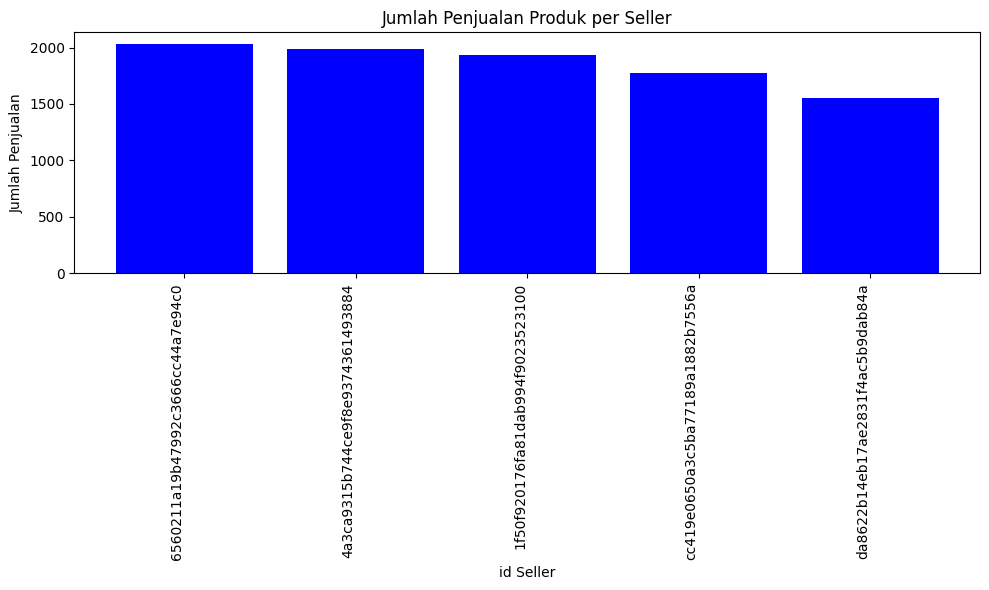

In [78]:
# Menghitung jumlah penjualan produk per seller
jumlah_penjualan_per_seller = df_order_items['seller_id'].value_counts().nlargest(5)

# Menyiapkan data untuk visualisasi
nama_seller = jumlah_penjualan_per_seller.index.tolist()
jumlah_penjualan = jumlah_penjualan_per_seller.values.tolist()

# Membuat grafik histogram jumlah penjualan produk per seller
plt.figure(figsize=(10, 6))
plt.bar(nama_seller, jumlah_penjualan, color='blue')
plt.xlabel('id Seller')
plt.ylabel('Jumlah Penjualan')
plt.title('Jumlah Penjualan Produk per Seller')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Menampilkan grafik
plt.show()

### Pertanyaan 2: "Produk mana yang sering terjual (memvisualisasi hanya 5 teratas), lalu seller mana yang menjual produk tersebut dan berapa banyak penghasilan seller tersebut?"

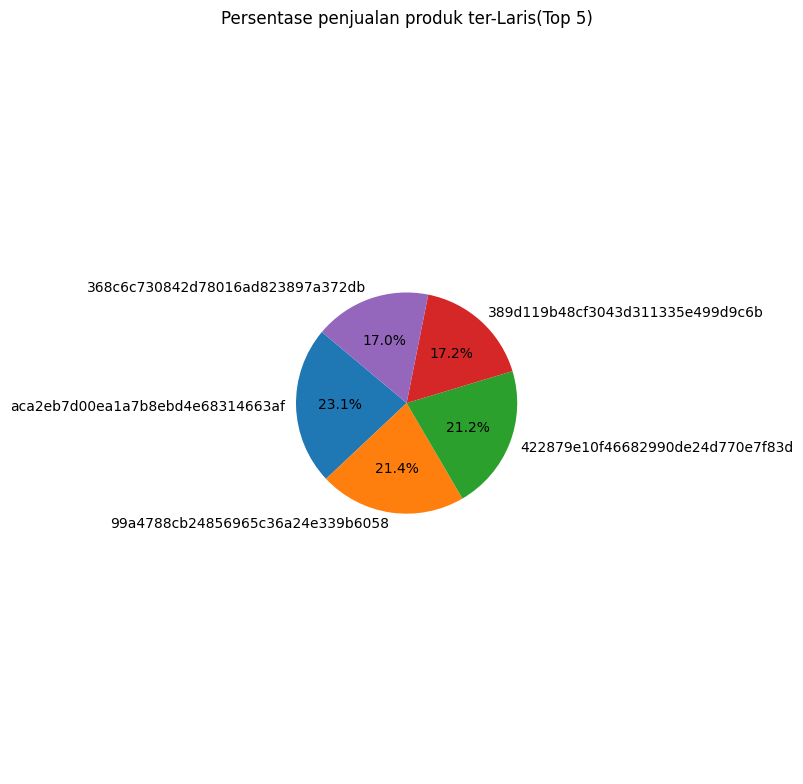

In [79]:
# Menghitung jumlah penjualan produk terbayak
jumlah_penjualan = df_order_items['product_id'].value_counts()

# Menyiapkan data untuk visualisasi (di sini, kita akan ambil 5 teratas)
top_produk = jumlah_penjualan.head(5)
id_produk = top_produk.index.tolist()
jumlah_penjualan = top_produk.values.tolist()

# Membuat diagram pie untuk menampilkan persentase penjualan produk per seller
plt.figure(figsize=(8, 8))
plt.pie(jumlah_penjualan, labels=id_produk, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat lingkaran menjadi lingkaran sejati (bukan elips)
plt.title('Persentase penjualan produk ter-Laris(Top 5)')
plt.tight_layout()

# Menampilkan diagram pie
plt.show()

In [80]:
# ID produk yang ingin Anda cari seller-nya
id_produk_terpilih = 'aca2eb7d00ea1a7b8ebd4e68314663af'

# Mencari seller yang menjual ID produk tertentu
seller_produk_terpilih = df_order_items[df_order_items['product_id'] == id_produk_terpilih]['seller_id'].unique()

if len(seller_produk_terpilih) > 0:
    print("Seller yang menjual produk dengan ID", id_produk_terpilih, "adalah:")
    print(seller_produk_terpilih)
else:
    print("Tidak ada data penjualan untuk produk dengan ID", id_produk_terpilih)

Seller yang menjual produk dengan ID aca2eb7d00ea1a7b8ebd4e68314663af adalah:
['955fee9216a65b617aa5c0531780ce60']


In [81]:
# Nama seller yang ingin Anda analisis penghasilannya
nama_seller = '955fee9216a65b617aa5c0531780ce60'
# Filter data penjualan berdasarkan seller tertentu
data_seller_terpilih = df_order_items[df_order_items['seller_id'] == nama_seller]

# Menghitung jumlah penghasilan dari penjualan yang dilakukan oleh seller tertentu
total_penghasilan = data_seller_terpilih['price'].sum()

print("Total penghasilan dari penjualan yang dilakukan oleh seller", nama_seller, "adalah:", total_penghasilan)

Total penghasilan dari penjualan yang dilakukan oleh seller 955fee9216a65b617aa5c0531780ce60 adalah: 135171.7


### Pertanyaan 3: "Negara mana yang memiliki banyak seller dan sedikit sedikit seller?"

In [82]:
# Menghitung jumlah seller dari setiap negara
jumlah_seller_per_negara = df_sellers['seller_state'].value_counts()
jumlah_seller_per_negara

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

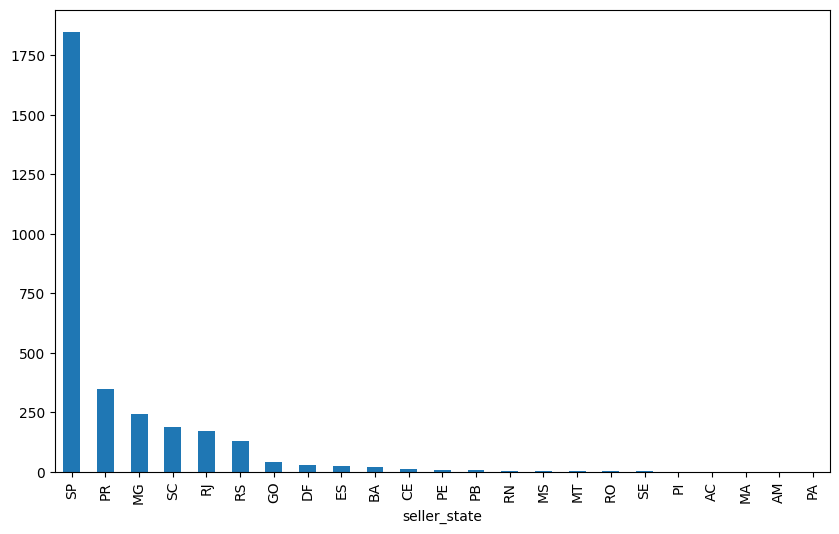

In [83]:
jumlah_seller_per_negara.plot(kind='bar', figsize=(10, 6))
plt.show()

### Pertanyaan 4: "10 kota dengan customer terbanyak?"

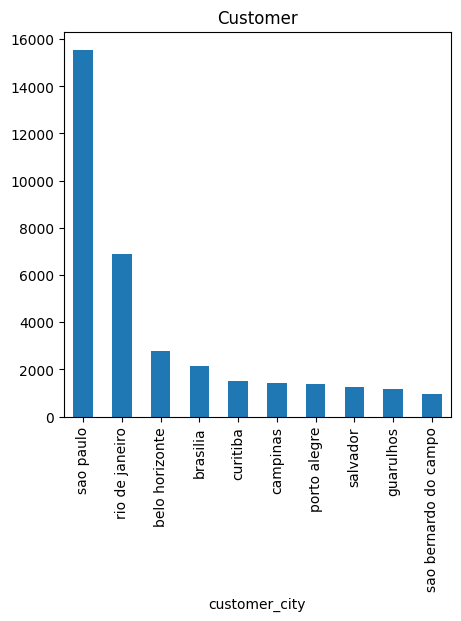

In [84]:
customers = df_customers['customer_city'].value_counts().nlargest(10)

customers.plot.bar(figsize=(5, 5))
plt.title("Customer")
plt.show()

### Pertanyaan 5: "10 Kategori Produk dengan Pemesanan Terbanyak"

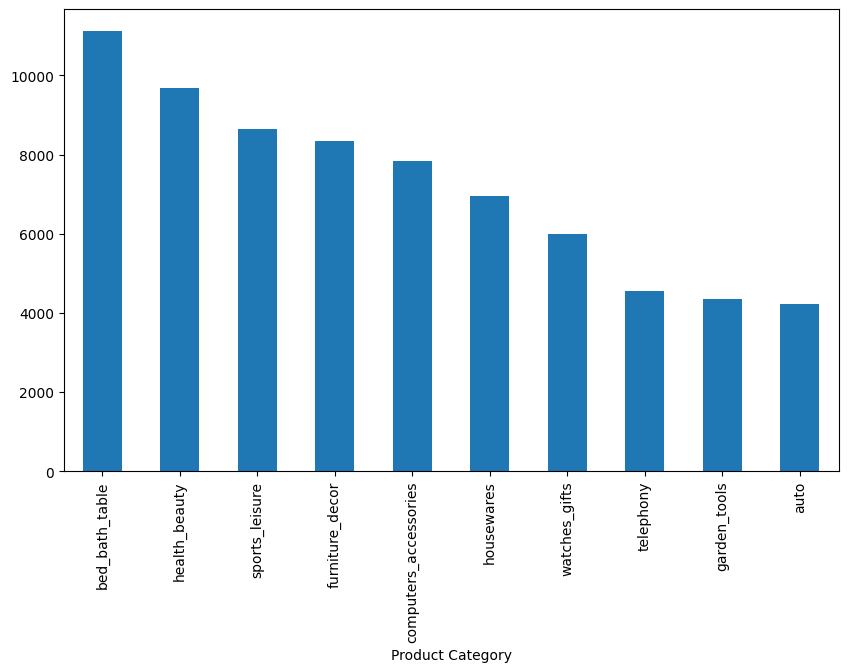

In [85]:
df_orders_products = df_order_items.set_index('product_id').join(df_products.set_index('product_id'))
df_translated_category = df_orders_products.set_index('product_category_name').join(df_product_category_name_translation.set_index('product_category_name'))

top_products = df_translated_category['product_category_name_english'].value_counts().nlargest(10).plot(kind='bar', figsize=(10, 6))
top_products.set_xlabel('Product Category')
plt.show()

### Pertanyaan 6: "Tren Penjualan Bulanan untuk Kategori Produk Terlaris tahun 2017-2018"

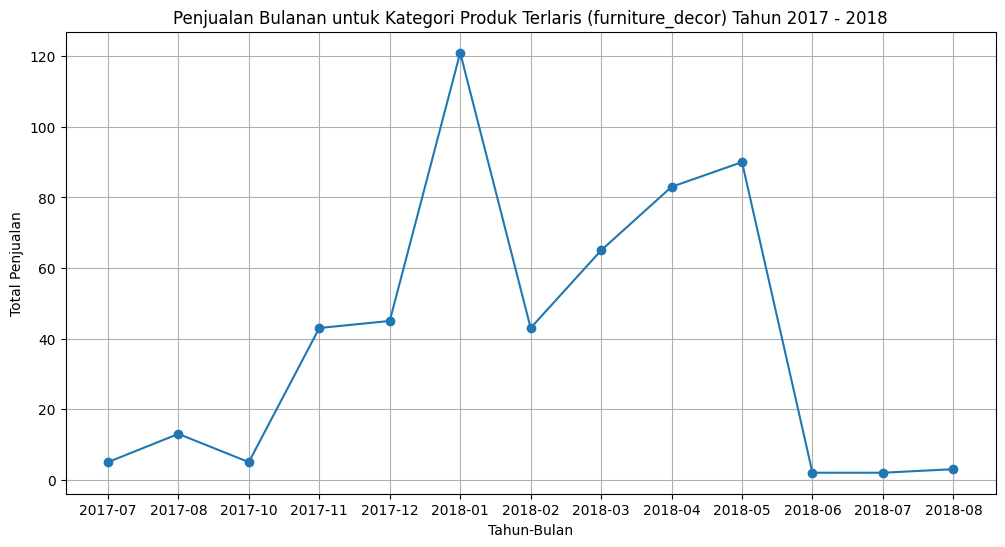

In [86]:
most_sold_product_category = most_sold_product_data.iloc[0]['product_category_name_english']

plt.figure(figsize=(12, 6))
plt.plot(most_sold_product_data["order_year_month_str"], most_sold_product_data["total_sales"], marker='o')
plt.title(f'Penjualan Bulanan untuk Kategori Produk Terlaris ({most_sold_product_category}) Tahun 2017 - 2018')
plt.xlabel('Tahun-Bulan')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.show()

### Pertanyaan 7: "Apa saja metode pembayaran yang sering digunakan?"


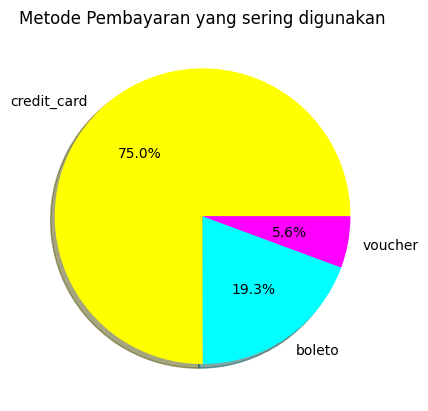

In [87]:
pembayaran_terbanyak = df_order_payments['payment_type'].value_counts()

metode = pembayaran_terbanyak.head(3)
payment_type = metode.index
pembayaran_terbanyak = metode.values

warna = ['yellow','aqua','magenta']
plt.pie(
    pembayaran_terbanyak,
    labels=payment_type,
    autopct='%1.1f%%',
    colors = warna,
    shadow = True
)

plt.title('Metode Pembayaran yang sering digunakan')
plt.show()

### Pertanyaan 8: "order_id yang sering berbelanja!"


Daftar order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
f22592e01ddc0711e6794f900fa5e787     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99437, dtype: int64


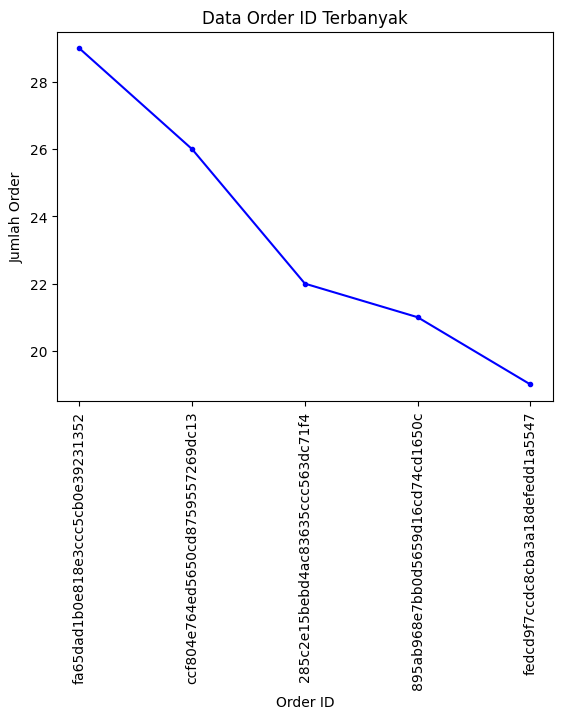

Total keseluruhan belanja yang dilakukan oleh Order ID : fa65dad1b0e818e3ccc5cb0e39231352 yaitu $ 457.99


In [88]:
#Menampilkan keseluruhan data order id
pembayaran_terbanyak = df_order_payments['order_id'].value_counts()
print("Daftar", pembayaran_terbanyak)

#Visualisasi Data
order_id = df_order_payments['order_id'].value_counts()
jumlah_order = order_id.head()
payment = jumlah_order.index.tolist()
order_id = jumlah_order.values.tolist ()

#Membuat Diagram
plt.plot(payment, order_id, marker = '.', color = 'blue')
plt.xticks(rotation=90)
plt.title('Data Order ID Terbanyak')
plt.ylabel('Jumlah Order')
plt.xlabel('Order ID')
plt.show()

#Menganalisis order_id teratas untuk mengetahui payment_value
order='fa65dad1b0e818e3ccc5cb0e39231352'
order_id_teratas = df_order_payments[df_order_payments['order_id'] == order]

# Menghitung jumlah penghasilan dari penjualan yang dilakukan oleh seller tertentu
total_belanja = order_id_teratas['payment_value'].sum()

print("Total keseluruhan belanja yang dilakukan oleh Order ID :", order, "yaitu $", total_belanja)

### Pertanyaan 9: "Bagaimana perbandingan metode pembayaran yang digunakan oleh seluruh customer?"

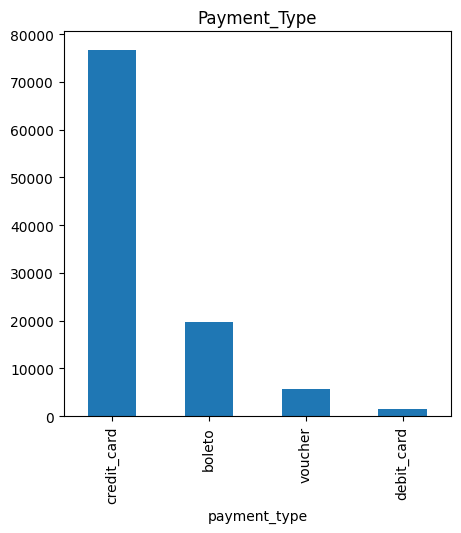

In [89]:
payment_type = df_order_payments['payment_type'].value_counts()
payment_type.plot.bar(figsize=(5, 5))
plt.title("Payment_Type")
plt.show()

### Pertanyaan 10: "Persebaran Lokasi yang Terdaftar"

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8776\2045354613.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


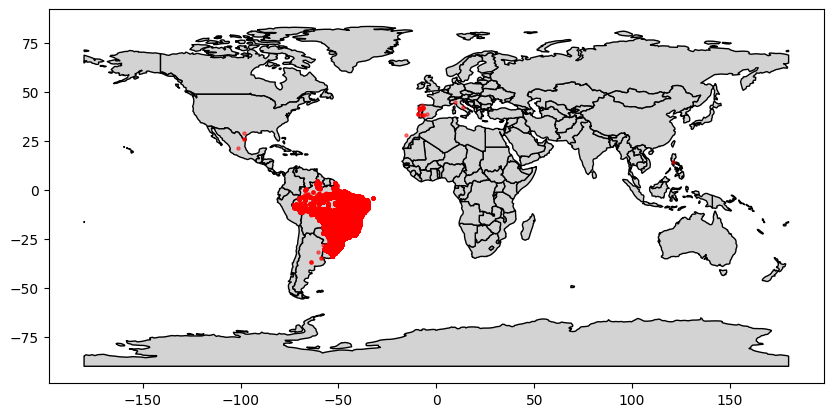

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.5)
plt.show()

## Conclusion

### Conclusion Pertanyaan 1: "Seller mana yang menjual produk paling banyak (memvisualisasi hanya 5 teratas)?"

**5 teratas seller yang menjual produk terbanyak**
1. 6560211a19b47992c3666cc44a7e94c0  jumlah produk terjual 2033
2. 4a3ca9315b744ce9f8e9374361493884  jumlah produk terjual 1987
3. 1f50f920176fa81dab994f9023523100  jumlah produk terjual 1931
4. cc419e0650a3c5ba77189a1882b7556a  jumlah produk terjual 1775
5. da8622b14eb17ae2831f4ac5b9dab84a  jumlah produk terjual 1551

### Conclusion Pertanyaan 2: "Produk mana yang sering terjual (memvisualisasi hanya 5 teratas), lalu seller mana yang menjual produk tersebut dan berapa banyak penghasilan seller tersebut?"


1. **5 teratas produk yang paling banyak terjual**
    1. aca2eb7d00ea1a7b8ebd4e68314663af    527
    2. 99a4788cb24856965c36a24e339b6058    488
    3. 422879e10f46682990de24d770e7f83d    484
    4. 389d119b48cf3043d311335e499d9c6b    392
    5. 368c6c730842d78016ad823897a372db    388

2. **lalu mencari seller yang mejual id produk tersebut** : 955fee9216a65b617aa5c0531780ce60
3. **Penghasilan seller tersebut** : 135171.7

### Conclusion Pertanyaan 3: "Negara mana yang memiliki banyak seller dan sedikit sedikit seller?"

Dari pertanyaan no 3 kita dapat menyimpulkan bahwa negara dengan seller terbanyak dan terdikit adalah:

**Negara terbanyak adalah**
1. 1849 = SP
2. 349 = PR
3. 244 = MG
4. 190 = SC
5. 171 = RJ
6. 129 = RS

**Negara tersedikit adalah**
1. 1 = PA, AM, MA, AC, PI.
2. 2 = RO, SE
3. 4 = MT
4. 5 = MS, RN
5. 6 = PB
6. 9 = PE
7. 13 = CE
8. 19 = BA
9. 23 = ES
10. 30 = DF
11. 40 = GO






### Conclusion Pertanyaan 4: "10 kota dengan customer terbanyak?"

**10 kota dengan customer terbanyak:**
1. Sao paulo
2. Rio de jeneiro
3. Belo horizonte
4. Brasilia
5. Curitiba
6. Campinas
7. Porto Alegre
8. Salvador
9. Guarulgos
10. Sao Bernando Do Campo

### Conclusion Pertanyaan 5: "10 Kategori Produk dengan Pemesanan Terbanyak"

**Dapat disimpulkan 10 kategori produk dengan pemesanan terbanyak yaitu**:
1. bed_bath_table
2. health_beauty
3. sports_leisure
4. furniture_decor
5. computers_accesories
6. housewares
7. watches_gifts
8. telephony
9. garden_tools
10. auto

### Conclusion Pertanyaan 6: "Tren Penjualan Bulanan untuk Kategori Produk Terlaris Tahun 2017-2018"

**Kategori produk terlaris selama tahun 2017-2018 adalah furniture_decor dengan tren penjualan bulanan sebagai berikut:**
- 2017-11 terjadi kenaikan penjualan melebihi 750%, mencapai angka 40
- 2018-01 terjadi kenaikan penjualan sekitar 200% dan merupakan puncak penjualan tahun 2017-2018, mencapai angka 120
- 2018-02 terjadi penurunan penjualan sebanyak 70%, mencapai angka 40 dan terus meningkat setiap bulannya hingga 2018-05, mencapai angka 90 sebelum hampir tidak ada penjualan sama sekali setelahnya

### Conclusion Pertanyaan 7: "Apa saja metode pembayaran yang sering digunakan?"


**3 Metode Pembayaran Terbanyak yaitu** :
1. credit_card dengan 75.0%
2. boleto dengan 19.3%
3. voucher dengan 5.6%

### Conclusion Pertanyaan 8: "order_id yang sering berbelanja!"

**5 Order ID teratas dengan berbelanja terbanyak yaitu** :
1. Order ID fa65dad1b0e818e3ccc5cb0e39231352 dengan total berbelanja sebanyak 29 kali
2. Order ID ccf804e764ed5650cd8759557269dc13 dengan total berbelanja sebanyak 26 kali
3. Order ID 285c2e15bebd4ac83635ccc563dc71f4 dengan total berbelanja sebanyak 22 kali
4. Order ID 895ab968e7bb0d5659d16cd74cd1650c dengan total berbelanja sebanyak 21 kali
5. Order ID fedcd9f7ccdc8cba3a18defedd1a5547 dengan total berbelanja sebanyak 19 kali <br>
Dan diketahui total keseluruhan belanja terbanyak teratas yang dilakukan oleh Order ID : fa65dad1b0e818e3ccc5cb0e39231352 yaitu $ 457.99

### Conclusion Pertanyaan 9: "Bagaimana perbandingan metode pembayaran yang digunakan oleh seluruh customer?"

**Bagaimana perbandingan metode pembayaran yang digunakan oleh seluruh customer?**
1. credit_card
2. boleto
3. voucher
4. debit_card
5. not_defined  

### Conclusion Pertanyaan 10: "Persebaran Lokasi yang Terdaftar"

Hampir semua yang terdaftar berasal dari negara Brasil, dengan mayoritas berasal dari negara bagian Sao Paulo(SP), Minas Gerais(MG), dan Rio de Janeiro(RJ).